<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/Solo_lo_nuevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar la base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])
stopwords.extend(['continuación', 'votamos', 'telemático', 'republicanaizquierda', 'unidainiciativa', 'puede', 'bien', 'propuesta' ,'abstencion', 'mayoría', 'absoluta', 'pregunta', 'don', 'vamos', 'votar', 'llevar', 'cabo', 'millón', 'muchas', 'gracias'])

In [12]:
# Se incorporan los nombres de los oradores como stopwords
from collections import Counter
nombres=[]
for i in base.namey.unique().tolist(): nombres.extend(str(i).split(' '))
nombres = [x.strip(' ') for x in nombres]
nombres = [x.strip(' †') for x in nombres]
nombres = [x.strip(',') for x in nombres]
nombres=list(Counter(nombres))
nombres.remove('')

In [13]:
len(nombres)

1910

In [14]:
nombres

['Fraile',
 'Poujade',
 'Modesto',
 'Rodríguez',
 'Valverde',
 'León',
 'Máximo',
 'Peces-Barba',
 'Martínez',
 'Gregorio',
 'Fraga',
 'Iribarne',
 'Manuel',
 'González',
 'Márquez',
 'Felipe',
 'Martín',
 'Toval',
 'Eduardo',
 'Benegas',
 'Haddad',
 'José',
 'María',
 'Silva',
 'Cienfuegos-Jovellanos',
 'Pedro',
 'Aizpún',
 'Tuero',
 'Jesús',
 'Reventós',
 'i',
 'Carner',
 'Joan',
 'Miguel',
 'Ángel',
 'Alzaga',
 'Villaamil',
 'Óscar',
 'Maturana',
 'Plaza',
 'Antonio',
 'Barón',
 'Crespo',
 'Enrique',
 'Zapatero',
 'Gómez',
 'Virgilio',
 'Camacho',
 'Zancada',
 'Blas',
 'Lluch',
 'Ernest',
 'Gámir',
 'Casares',
 'Luis',
 'Aguiriano',
 'Forniés',
 'Almunia',
 'Amann',
 'Joaquín',
 'Guerra',
 'Alfonso',
 'Solana',
 'Madariaga',
 'Javier',
 'Triginer',
 'Fernández',
 'Josep',
 'Maria',
 'Múgica',
 'Herzog',
 'Obiols',
 'Germà',
 '"Raimon"',
 'Pons',
 'Irazazábal',
 'Félix',
 'Núñez',
 'Pérez',
 'Cisneros',
 'Laborda',
 'Gabriel',
 'Yuste',
 'Grijalba',
 'Francisco',
 'Vicente',
 'Ciriac

In [15]:
stopwords.extend(nombres)

In [16]:
pd.DataFrame(nombres).to_csv('nombres.csv', encoding='latin' )

In [30]:
legislaturas=['II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']

n=5
sample=base[base.legislatura=='I'].sample(n)
for x in legislaturas: 
  sample=sample.append(base[base.legislatura==x].sample(n))

In [31]:
sample.to_csv('sample.csv', sep=';', encoding='utf-8-sig')

# Density

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=[2,2], stop_words=stopwords)
bow = vect.fit_transform(base['tokens'])
total_features = len(vect.vocabulary_)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abad', 'abascal', 'abeilhe', 'abejón', 'abel', 'aburto', 'acebes', 'acedo', 'acevedo', 'achutegui', 'acosta', 'acín', 'acítores', 'adela', 'adelaida', 'adolfo', 'adriana', 'adriano', 'adrover', 'adsuar', 'adámez', 'adán', 'agius', 'agramunt', 'aguado', 'aguerri', 'aguilar', 'aguilera', 'aguiriano', 'aguirre', 'agustín', 'ahuja', 'aizpún', 'aja', 'alarcón', 'alba', 'albaladejo', 'albendea', 'alberdi', 'albero', 'alberto', 'albiach', 'albiñana', 'alborch', 'albéniz', 'alcalde', 'alcaraz', 'alcañiz', 'alconchel', 'alcover', 'alcázar', 'aldea', 'aledo', 'alegre', 'alegría', 'alejandro', 'alfonso', 'alfred', 'alfredo', 'alférez', 'alicia', 'alierta', 'alique', 'allende', 'almagro', 'almaraz', 'almunia', 'alonso', 'alvear', 'alzaga', 'alén', 'alós', 'amador', 'amann', 'amarillo', 'amate', 'amelia'

In [ ]:
sum_words = bow.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1])
vocabulary, ord = zip(*words_freq[:int(total_features)])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def dens (lista, n, features): 
  ret=[]
  for x in range(1,n+1): 
    ret.append(lista[int(features*((x-1)/n)):int(features*((x)/n))].mean())
  bars=[None]*(n)
  for x in range(1,n+1): 
    bars[x-1]=str(int(x*100/n))
  plt.bar(bars, ret)

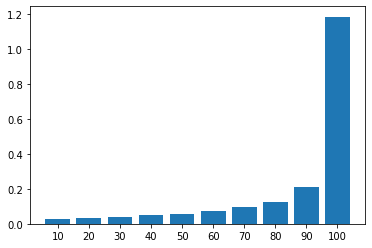

In [ ]:
dens(np.array(ord), 10, total_features)

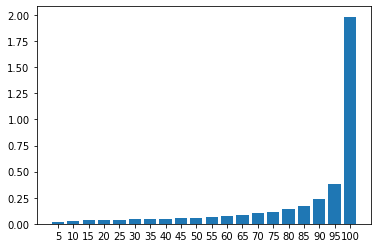

In [ ]:
dens(np.array(ord), 20, total_features)

# TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TFIDF que conserva solo los términos que no están en el 5% más frecuente ni en el 75% menos frecuente

# Primero selecciono los bigramas de mayor TFIDF (el hiperparámetro max_features selecciona siempre los n-gramas indicados de mayor tfidf)
vect = TfidfVectorizer(ngram_range=[2,2], stop_words=stopwords)
bow = vect.fit_transform(base['tokens'])
total_features = len(vect.vocabulary_)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abad', 'abascal', 'abeilhe', 'abejón', 'abel', 'aburto', 'acebes', 'acedo', 'acevedo', 'achutegui', 'acosta', 'acín', 'acítores', 'adela', 'adelaida', 'adolfo', 'adriana', 'adriano', 'adrover', 'adsuar', 'adámez', 'adán', 'agius', 'agramunt', 'aguado', 'aguerri', 'aguilar', 'aguilera', 'aguiriano', 'aguirre', 'agustín', 'ahuja', 'aizpún', 'aja', 'alarcón', 'alba', 'albaladejo', 'albendea', 'alberdi', 'albero', 'alberto', 'albiach', 'albiñana', 'alborch', 'albéniz', 'alcalde', 'alcaraz', 'alcañiz', 'alconchel', 'alcover', 'alcázar', 'aldea', 'aledo', 'alegre', 'alegría', 'alejandro', 'alfonso', 'alfred', 'alfredo', 'alférez', 'alicia', 'alierta', 'alique', 'allende', 'almagro', 'almaraz', 'almunia', 'alonso', 'alvear', 'alzaga', 'alén', 'alós', 'amador', 'amann', 'amarillo', 'amate', 'amelia'

In [ ]:
top_vect =  TfidfVectorizer(ngram_range=[2,2], stop_words=stopwords, max_features=int(total_features * 0.05))
top_bow = top_vect.fit_transform(base['tokens'])

In [ ]:
print(f"De los {total_features} de bigramas totales se identifican los {len(top_vect.vocabulary_)} con más TFIDF.")

De los 8228192 de bigramas totales se identifican los 411409 con más TFIDF.


In [ ]:
# Este es el listado de los bigramas del 5% mayor TFIDF
top_vect.vocabulary_

{'procederá dar': 302484,
 'artículo reglamento': 26222,
 'frail poujad': 167606,
 'cámara correspond': 90966,
 'presidencia mesa': 294299,
 'mesa edad': 232576,
 'si encuentra': 353656,
 'encuentra sala': 135184,
 'presidencia pausa': 294326,
 'tampoco present': 376502,
 'león máximo': 213842,
 'máximo rodríguez': 244492,
 'rodríguez valverd': 342835,
 'presidencia rodríguez': 294376,
 'ocupa presidencia': 257244,
 'tome posesión': 385878,
 'mismo ruego': 238068,
 'pérez lópez': 316312,
 'miranda garcía': 236381,
 'ocupen puesto': 257353,
 'gonzález pérez': 176354,
 'lópez alvarez': 218822,
 'alvarez miranda': 17446,
 'nombr mesa': 250594,
 'ss ss': 370606,
 'mejor ánimo': 229427,
 'alta misión': 16870,
 'perdonen ss': 272249,
 'fi gura': 161008,
 'socialista obrero': 366088,
 'obrero español': 256156,
 'clase servicio': 55758,
 'servicio nación': 351885,
 'tribuna pública': 393078,
 'pública siendo': 317389,
 'siendo joven': 357426,
 'intervencion cámara': 203218,
 'socialista aunqu'

In [ ]:
sum_words = bow.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1])
vocabulary, _ = zip(*words_freq[:int(total_features * 0.75)])
less_vocabulary = list(vocabulary)

In [ ]:
# Este es el listado del 75% de los bigramas con menor TFIDF
less_vocabulary

['consumo inscriben',
 'inscriben lógicament',
 'necesariament descriptiva',
 'descriptiva obligadament',
 'obligadament comprometida',
 'comprometida querría',
 'discurso reflexivo',
 'reflexivo cámara',
 'conscient sometiendo',
 'juicio validez',
 'validez viabilidad',
 'óptica sociopolítica',
 'sociopolítica apliquen',
 'apliquen sistema',
 'sanitario vicepresident',
 'preciso obligado',
 'obligado balanc',
 'balanc tomar',
 'colectivo llegar',
 'merec prefier',
 'prefier exig',
 'sanidad goza',
 'tercermundista termin',
 'termin llegado',
 'conocedor sanidad',
 'medio extensión',
 'comparamo convecino',
 'convecino europero',
 'comunitaria cerrado',
 'cerrado horizont',
 'horizont referencia',
 'importa compromet',
 'compromet nue',
 'tra sanidad',
 'sanitario padecen',
 'desequilibrio consta',
 'científica profesion',
 'colectivo asistenci',
 'asistenci toda',
 'sabemo usuario',
 'trato sanidad',
 'aparentement barata',
 'barata bolsillo',
 'bolsillo individu',
 'individu realidad

In [ ]:
print(f"De los {total_features} de bigramas totales se identifican los {len(less_vocabulary)} con menor TFIDF.")

De los 8228192 de bigramas totales se identifican los 6171144 con menor TFIDF.


In [ ]:
voc=vect.vocabulary_.keys()-less_vocabulary-top_vect.vocabulary_.keys()

In [ ]:
len(voc)

1645640

In [ ]:
cv=TfidfVectorizer(ngram_range=[2,2], vocabulary=voc)
vec = cv.fit(base['tokens'])

In [ ]:
matrix = vec.transform(base['tokens'])

In [ ]:
matrix.shape

(334421, 1645640)

# LDA con 10 clusters

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Acá hay un problema porque se sigue usando 10 clusters cuando en realidad habría que chequear el número óptimo de clusters una vez definida la cantidad de bigramas a utilizar
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

In [ ]:
lda.fit(matrix)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
display_topics(lda, feature_names=cv.get_feature_names_out(), no_top_words=20)

Topic 1:
mismo matut , ciudadano salvador , telechea ciudadano , rivera confeder , interior miguel , mismo vendrel , mismo borrà , popular juncal , merino formulada , político modifican , socialista urquizu , ángel gutiérrez , común iglesia , barreda terminar , popular píriz , eajpnv agirretxea , girauta terminar , ridao contestar , socialista ferrer , esteban upyd
Topic 2:
legarda adelant , permanent mixto , pérez confeder , calduch catalán , canadé mixto , hera convergència , bosch terminar , galván confeder , interior gabriel , pérez terminar , agirretxea popular , surroca ir , republicano eritja , popular estel , olmo popular , gonzálezmoro mixto , picó campuzano , joaquín puig , nuet fijación , ciudadano faba
Topic 3:
montserrat adelant , marea expósito , muchísima representación , teresa angulo , sumelzo socialista , reina popular , popular molinero , montón fijación , tardà finalizar , socialista botella , popular ruano , davila unión , dirigida gabriel , socialista tundidor , d

In [ ]:
lda.components_.shape

(10, 1645640)

In [ ]:
import scipy as sp
from scipy.special import logsumexp
import numpy as np

In [ ]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

In [ ]:
def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [ ]:
frex_df=pd.DataFrame(frex(lda))
frex_df

,0,1,2,3,4,5,6,7,8,9,...,163017,163018,163019,163020,163021,163022,163023,163024,163025,163026
0,0.171230,0.585171,0.077409,0.999297,0.249853,0.274329,0.013673,0.051542,0.008938,0.053714,...,0.461637,0.233950,0.835446,0.307373,0.348187,0.510595,0.395070,0.650024,0.585421,0.321454
1,0.024161,0.484886,0.077337,0.027343,0.217952,0.273374,0.013612,0.051398,0.008781,0.053766,...,0.456411,0.626283,0.319778,0.332898,0.360416,0.308161,0.406895,0.526527,0.685021,0.385255
2,0.020799,0.422276,0.076495,0.026999,0.211156,0.272315,0.999464,0.050865,0.008651,0.053185,...,0.473560,0.189224,0.782424,0.288076,0.344615,0.335994,0.346888,0.714253,0.570337,0.766381
3,0.708857,0.564315,0.072967,0.025103,0.231517,0.268180,0.012448,0.047996,0.007927,0.050409,...,0.366201,0.380166,0.767079,0.259369,0.357870,0.212334,0.255546,0.366330,0.541776,0.752601
4,0.162381,0.345657,0.077036,0.027237,0.165210,0.273475,0.013550,0.051601,0.008791,0.053670,...,0.409857,0.760319,0.769518,0.306313,0.337970,0.509110,0.324131,0.689538,0.543385,0.438488
5,0.785185,0.489497,0.998263,0.027087,0.227911,0.996799,0.013440,0.051363,0.999647,0.053777,...,0.465718,0.478704,0.624102,0.338549,0.330361,0.409281,0.296974,0.659329,0.610730,0.346462
6,0.678810,0.423871,0.054204,0.018034,0.153155,0.172596,0.009542,0.990765,0.005613,0.038111,...,0.319239,0.571007,0.553509,0.216207,0.249478,0.215461,0.885974,0.522337,0.785272,0.525566
7,0.117742,0.652261,0.041585,0.014030,0.896500,0.094655,0.008704,0.027761,0.005410,0.984303,...,0.718512,0.432401,0.494855,0.848579,0.829356,0.744339,0.157597,0.543039,0.269374,0.452022
8,0.595718,0.516664,0.077850,0.027582,0.199894,0.272439,0.013647,0.051761,0.008877,0.054178,...,0.341284,0.127920,0.661391,0.340978,0.255600,0.302783,0.216389,0.572428,0.702511,0.187727
9,0.026584,0.458413,0.077985,0.027554,0.195190,0.275020,0.013847,0.051994,0.009009,0.054574,...,0.429470,0.365502,0.774173,0.341639,0.326357,0.427706,0.312967,0.690742,0.637317,0.395438


In [ ]:
no_top_words=10
feature_names=vec.get_feature_names_out()
for topic_idx, topic in enumerate(frex(lda)):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

Topic 1:
podemosen comú , podemen marea , comú podemen , unido podemosen , confeder unido , ministra adelant , acabado tiempo , diputada terminar , ministra defensa , adelant ministra
Topic 2:
catalunya verd , posicion mixto , doña maría , rodríguez zapatero , celebración extraordinaria , acuerd celebración , pérez fernández , mixto campuzano , campuzano canadé , mixto martínez
Topic 3:
vasco pnv , diputada doña , desean fijar , posicion vasco , interpelacion urgent , convalidación derogación , pnv olabarría , vasco azpiazu , pnv azpiazu , vasco esteban
Topic 4:
sánchez llibr , fernández davila , número formula , lópez garrido , dirigida ministra , pasamo fijación , canaria mardon , legarda uriart , lópez chamosa , mixto fernández
Topic 5:
aprobada artículo , aprobada resto , aprobada número , aprobada disposición , dictamen sección , aprobada sección , defensa mixto , aprobada transaccion , sección relativo , aprobado artículo
Topic 6:
cha izquierda , icveuia cha , iu icveuia , gil lá

In [ ]:
# Topic que presenta mayor FREX para cada bigrama
d = []
for n in enumerate(feature_names):
    d.append(
        {
            'N': n[0],
            'Bigrama': n[1],
            'Topic':  frex_df[n[0]].argsort()[9]
        }
    )

bi_topic_frex=pd.DataFrame(d)
bi_topic_frex.head(20)

,N,Bigrama,Topic
0,0,ab initio,5
1,1,abajo arriba,7
2,2,abandon hemiciclo,5
3,3,abandon tribuna,0
4,4,abandonado suert,7
5,5,abandonan hemiciclo,5
6,6,abandonar hemiciclo,2
7,7,abandonar tribuna,6
8,8,abandonen hemiciclo,5
9,9,abandono educativo,7


In [ ]:
# Topic que presenta mayor Weight para cada bigrama
d = []
nombres=cv.get_feature_names_out()
componentes=lda.components_.transpose()
for n in enumerate(lda.components_.transpose()):
    d.append(
        {
            'N': n[0],
            'Bigrama': nombres[n[0]],
            'Topic':  componentes[n[0]].argsort()[9]
        }
    )

pd.DataFrame(d).head(20)

,N,Bigrama,Topic
0,0,ab initio,6
1,1,abajo arriba,7
2,2,abandon hemiciclo,5
3,3,abandon tribuna,0
4,4,abandonado suert,7
5,5,abandonan hemiciclo,5
6,6,abandonar hemiciclo,2
7,7,abandonar tribuna,6
8,8,abandonen hemiciclo,5
9,9,abandono educativo,7


# Base con Topics

In [ ]:
# Ejemplo de Topic por FREX de acuerdo al bigrama más presente en ese discurso
discurso=2
print(f"Bigrama más usado: {matrix[discurso].argmax()}")
print(f"Topic: {frex_df[matrix[discurso].argmax()].argsort()[9]}")

Bigrama más usado: 124686
Topic: 3


In [ ]:
base['id']=range(0,334421)

In [ ]:
def t_FREX(row):
  return frex_df[matrix[row['id']].argmax()].argsort()[9]

In [ ]:
base['Topic_FREX']=base.apply (lambda row: t_FREX(row), axis=1)

In [ ]:
# Ejemplo de Topic por weight de acuerdo al bigrama más presente en ese discurso
discurso=2
print(f"Bigrama más usado: {matrix[discurso].argmax()}")
print(f"Topic: {lda.components_.transpose()[matrix[discurso].argmax()].argsort()[9]}")

Bigrama más usado: 124686
Topic: 3


In [ ]:
def t_weight(row):
  return lda.components_.transpose()[matrix[row['id']].argmax()].argsort()[9]

In [ ]:
base['Topic_weight']=base.apply (lambda row: t_weight(row), axis=1)

In [ ]:
base.head(5)

,Unnamed: 0,orden,namex,intervention,fecha,legislatura,pleno,role,oradorx,namey,...,total,oradory,cataluna,estatut,inter_raw,partido,tokens,id,Topic_FREX,Topic_weight
0,0,"LECTURA DEL REAL DECRETO. DE CONVOCATORIA, DE ...",PRESIDENTE PROVISIONAL (Fraile Poujade),"Señoras y señores Diputados, se abre la sesió...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['señora', 'señor', 'diputado', 'abr', 'junta'...",0,5,6
1,1,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL,(Fraile Poujade): Según la relación que cons....,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['frail', 'poujad', 'según', 'relación', 'con'...",1,5,5
2,2,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL (Rodríguez Valverde),"Siguiendo el orden del día, ruego al señor Es...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['siguiendo', 'ruego', 'esperabé', 'arteaga', ...",2,3,3
3,3,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Ro.dríguez Valverde),"Al reanudarse la sesión, procedería dar lectu...",23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RO.DRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['reanudars', 'procedería', 'dar', 'lectura', ...",3,6,6
4,5,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Rodríguez Valverde),Una vez leído el informe de la Junta Electora...,23/03/1979,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['leído', 'inform', 'junta', 'elector', 'centr...",4,5,7


In [ ]:
# Promedio general de bigramas únicos por discurso
(matrix != 0).sum(1).mean()

24.149455327267127

In [ ]:
# Matriz de probabilidad de topic por discurso
disc_frex=matrix*frex_df.transpose()

In [ ]:
pd.DataFrame(disc_frex)

,0,1,2,3,4,5,6,7,8,9
0,0.000902,0.000850,0.996083,0.000867,0.000894,0.996897,0.776830,0.000714,0.000929,0.000894
1,1.311432,1.247203,1.126417,1.424518,0.842034,1.998308,0.959308,0.370123,1.303429,1.083963
2,1.532685,1.421008,1.530099,2.217678,1.313264,2.369619,1.805603,2.857327,1.297691,1.378054
3,0.521412,0.543214,0.871986,0.535310,0.469273,0.819066,1.002931,0.748592,0.479033,0.519237
4,1.016500,1.213299,1.003653,1.379574,0.896700,1.919454,0.770886,1.173375,0.934832,0.982908
...,...,...,...,...,...,...,...,...,...,...
334416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334417,0.324500,0.316727,0.568359,0.299146,0.320558,0.321503,0.795257,1.872398,0.656868,0.329157
334418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334419,0.418815,0.626280,1.181976,1.483105,0.592045,0.420764,1.070379,1.008453,0.411899,0.422753


In [ ]:
# Se asigna a la base el topic por probabilidad (en vez de solamente considerar el bigrama más repetido)
base['Topic_FREX']=disc_frex.argmax(axis=1)

In [ ]:
# Ahora lo mismo pero por weights
disc_weights=matrix*lda.components_.transpose()

In [ ]:
pd.DataFrame(disc_weights)

,0,1,2,3,4,5,6,7,8,9
0,0.100007,0.100002,45.504409,0.100007,0.100003,81.584917,173.985013,0.100010,0.100003,0.100001
1,0.259315,0.259326,0.259316,0.424371,0.259315,14.574365,4.070087,3.689100,0.259319,0.259325
2,0.554463,0.554536,1.216882,9.286223,0.554499,16.041641,20.479805,41.893518,0.554450,0.554528
3,0.215742,0.215758,3.144330,0.215838,0.215744,8.098557,20.925129,8.100356,0.215757,0.215773
4,0.298002,1.102012,0.298006,3.614168,0.298001,19.005439,0.927025,13.691019,0.298001,0.298013
...,...,...,...,...,...,...,...,...,...,...
334416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334417,0.297447,0.297447,16.434079,0.297446,0.297449,0.297449,8.543146,104.314428,9.534516,0.297451
334418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334419,0.400293,5.595260,20.185683,24.058262,8.791813,0.400358,23.116286,57.990098,0.400168,0.400190


In [ ]:
base['Topic_weight']=disc_weights.argmax(axis=1)

# LASSO por legislatura

In [ ]:
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from numpy import argsort
import statistics
from statistics import mode

In [ ]:
# Relevancia de bigramas en la predicción por legislatura
tabla=[]
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']

cv=CountVectorizer(ngram_range=[2,2], stop_words=stopwords, max_df=0.95, min_df=0.001)
n=5

for x in legislaturas: 
  base_year=base[base.legislatura==x]
  
  vec = cv.fit(base_year['tokens'])
  train_matrix = vec.fit_transform(base_year['tokens']) 
  lr = LogisticRegression(penalty='l1', max_iter=50, solver='liblinear')
  lr.fit(train_matrix,base_year['party'])
  
  features=[]
  s=lr.coef_[0]
  
  print(f"Legislatura: {x} - Most Frecuent Topic: {mode(bi_topic_frex['Topic'][argsort(s)])}")
  print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))

Legislatura: I - Most Frecuent Topic: 7
+---------------------+--------------------+---------------------+--------------------+---------------------+
|    duda ninguna     |  contestar nombr   |   senado proyecto   |  número coalición  |    lenguaj hecho    |
| -3.8752352108766335 | -2.858277768762358 | -2.7852824719678857 | -2.744453923397834 | -2.7283781351853524 |
|          6          |         9          |          7          |         1          |          7          |
| respuesta recibida  |   cualquier caso   | artículo entendemo  | socialista votado  |    pasamo examen    |
| 1.9616180115723716  | 1.9676523209145371 |  1.972206851275881  | 2.257110384441647  | 3.1092563910999638  |
|          7          |         6          |          6          |         6          |          6          |
+---------------------+--------------------+---------------------+--------------------+---------------------+
Legislatura: II - Most Frecuent Topic: 7
+----------------------+---------------

# LASSO por año

In [ ]:
# Relevancia de bigramas en la predicción por año
tabla=[]

nombres=cv.get_feature_names_out()
componentes=lda.components_.transpose()
n = 5

for x in range (1979, 2010): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  train_matrix = vec.fit_transform(base_year['tokens'])
  y_train= base_year['party']
  lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
  lr.fit(train_matrix,y_train)

  s = lr.coef_[0]
    
  print(f"Año: {x}")
  print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))

Año: 1979
+---------------------+--------------------+---------------------+---------------------+--------------------+
|  correspond ahora   |   foral navarra    |   nombr centrista   |      quier uso      |  cuestión previa   |
| -3.2193442231019627 | -2.567572448927969 | -1.9372835735574527 | -1.8362037346044535 | -1.811162857078032 |
|          9          |         7          |          6          |          7          |         1          |
|  socialista votado  |   cualquier caso   | ningún inconvenient |  nombr socialista   | formacion política |
| 1.4360795433298517  | 1.470023792237444  |  1.541011394531198  | 1.5442987698558934  | 1.963851738858638  |
|          6          |         7          |          6          |          7          |         3          |
+---------------------+--------------------+---------------------+---------------------+--------------------+
Año: 1980
+---------------------+--------------------+---------------------+----------------------+-----------